In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [29]:
data = pd.read_csv('Dataset/Dataset.csv')
data.head()

,a_up,a_right,a_down,a_left,b_up,b_right,b_down,b_left
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data_target = pd.read_csv('Dataset/Labels.csv')
data_target.head()

,direction
0,1
1,1
2,1
3,1
4,1


In [33]:
df = pd.concat([data, data_target],axis=1)

df.head()

,a_up,a_right,a_down,a_left,b_up,b_right,b_down,b_left,direction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [34]:
df.isnull().sum()
df.dropna(inplace=True)

In [35]:
X = np.array(df.loc[:,df.columns!='direction'])
Y = np.array(df['direction'])

Y = Y.reshape(-1,1)

X.shape,Y.shape

((6937, 8), (6937, 1))

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5202, 8)
(5202, 1)
(1735, 8)
(1735, 1)


In [62]:
model = tf.keras.models.Sequential([
    Dense(8,input_dim=8,activation="relu"),
    Dense(16,activation="relu"),
    Dense(128,activation="relu"),
    Dense(4,activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
history = model.fit(X_train, Y_train,epochs=150)

Epoch 1/150


163/163 [==============================] - 1s 1ms/step - loss: 0.5872 - accuracy: 0.9179
Epoch 2/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9831
Epoch 3/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9850
Epoch 4/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9887
Epoch 5/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9890
Epoch 6/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9890
Epoch 7/150
163/163 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9890
Epoch 8/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9890
Epoch 9/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9890
Epoch 10/150
163/163 [==============================] - 0s 1ms/step - loss: 0.0598 - accuracy: 0.9890
E

In [64]:
model.evaluate(X_test,Y_test)

55/55 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9867


[0.06562560796737671, 0.9867435097694397]

In [65]:
model.save('model/weight_snake.h5')

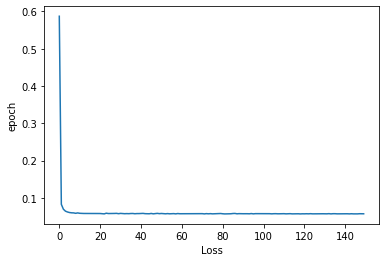

In [66]:
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('epoch')
plt.show()

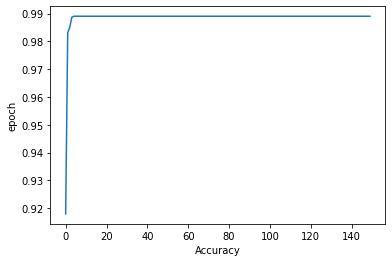

In [67]:
plt.plot(history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('epoch')
plt.show()